In [1]:
import jax
import jax.nn as jnn
import jax.numpy as jnp
import numpy as np

import equinox as eqx
import diffrax
import optax
from functools import partial

In [2]:
import os
os.chdir("..")
from policy.policy_training import DPCTrainer
from exciting_environments.pmsm.pmsm_env import PMSM, step_eps
import jax_dataclasses as jdc
from models.models import MLP_lin,MLP
#from policy.networks import MLP#,MLP2
import matplotlib.pyplot as plt

2025-02-15 13:11:12.152654: W external/xla/xla/service/gpu/nvptx_compiler.cc:760] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.6.77). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [3]:
gpus = jax.devices()
jax.config.update("jax_default_device", gpus[1])
jax.config.update("jax_enable_x64", True)

In [4]:
motor_env = PMSM(
    saturated=True,
    LUT_motor_name="BRUSA",
    batch_size=1,
    control_state=[], 
    static_params = {
            "p": 3,
            "r_s": 15e-3,
            "l_d": 0.37e-3,
            "l_q": 1.2e-3,
            "psi_p": 65.6e-3,
            "deadtime": 0,
    })

## Model Learning

In [5]:
from utils.interactions import rollout_traj_env_policy
from models.model_training import ModelTrainer
from models.models import NeuralEulerODE

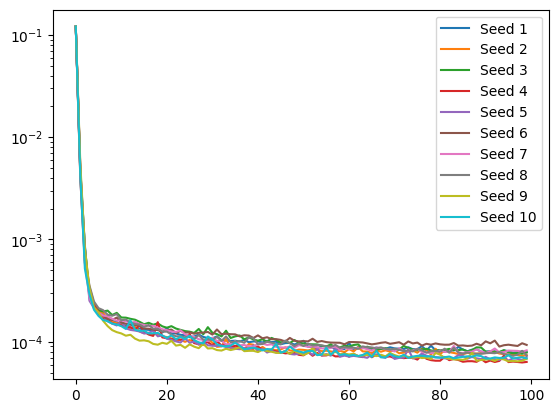

In [9]:
# idxs=[25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
idxs= list((np.linspace(1,10,10)).astype(int))
for idx in idxs:
    plt.plot(jnp.load(f"final_models/black_box/val_losses/Model_4_128_{idx}.npy")[:],label=f"Seed {idx}")
    plt.yscale('log')
plt.legend()